# Part of Lab-Sheet 9 (COM3502-4502-6502 Speech Processing)

## Linear Predictive Coding (LPC)

This lab sheet is part of the lecture COM[3502](http://www.dcs.shef.ac.uk/intranet/teaching/public/modules/level3/com3502.html "Open web page for COM3502 module")-[4502](http://www.dcs.shef.ac.uk/intranet/teaching/public/modules/level4/com4502.html "Open web page for COM4502 module")-[6502](http://www.dcs.shef.ac.uk/intranet/teaching/public/modules/msc/com6502.html "Open web page for COM4502 module") Speech Processing at the [University of Sheffield](https://www.sheffield.ac.uk/ "Open web page of The University of Sheffield"), Dept. of [Computer Science](https://www.sheffield.ac.uk/dcs "Open web page of Department of Computer Science, University of Sheffield").

It is probably easiest to open this Jupyter Notebook with [Google Colab](https://colab.research.google.com/notebooks/intro.ipynb#recent=true "Open in Google Colab") since GitHub's Viewer does not always show all details correctly. <a href="https://colab.research.google.com/github/sap-shef/SpeechProcesssingLab/blob/main/Lab-Sheets/LPC/lpc.ipynb"><img align="right" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open Notebook in Google Colab" title="Open and Execute the Notebook directly in Google Colaboratory"></a>

Please put questions, comments and correction suggestions in the [Blackboard](https://vle.shef.ac.uk) discussion board or send an email to [s.goetze@sheffield.ac.uk](mailto:s.goetze@sheffield.ac.uk).

## Navigation
![LPC needs Fundamental Frequency, LPC Analysis, and LPC Synthesis](images/flow_lpc.svg)

* The Notebooks [`correlation.ipynb`](./LPC/correlation.ipynb),  [`autocorrelation.ipynb`](./LPC/autocorrelation.ipynb) and [`fundamental_frequency.ipynb`](./LPC/fundamental_frequency.ipynb)  repeat knowlege already known from lab sheet [Lab-Sheet 3](Lab-Sheet-3.ipynb) and [Lab-Sheet 7](Lab-Sheet-7.ipynb), respectively.
* The Notebook [`lpc_analysis.ipynb`](./LPC/lpc_analysis.ipynb)
* The Notebook [`lpc_synthesis.ipynb`](./LPC/lpc_synthesis.ipynb)
* The Notebook [`lpc.ipynb`](./LPC/lpc.ipynb)
 * The Notebook [`lpc_video.ipynb`](./LPC/lpc_video.ipynb)

## Intended Learning Outcomes (ILOs)

After completing this notebook, students should be able to

- *describe* the source-filter model and *relate* Linear Predictive Coding to it,
- *understand* how to *implement* a function which encodes and decodes a speech signal via Linear Predictive Coding.

## Source-Filter Model

As learned before human speech production can be seen as a two-step process, described by the *source-filter model* which is visualized below.
The first step is the sound *source*, in human speech production the vocal tract, and the resulting sound then passes through an acoustic *filter*, the vocal tract filter.

The sound source can either be a series of impulses (as produced by glottis) or a noise signal (as produced by the pharynx) or a combination of both.
This source signal is then modified by a linear filter (in humans by the vocal tract) to produce the final sound.

![The Source-Filter Model](images/source_filter_model.svg)

To implement the speech synthesis depicted above we need knowlegde about the following quantities:
- Ratio of voiced vs. unvoiced speech $\alpha$
- Frequency of the impulse train $f_0$
- Vocal tract filter coefficients $a_i$

## Linear Prediction

*Linear Prediction* follows the idea that the samples of a speech signal can be *predicted* from a *linear* combination of a finite number $P$ of its previous samples, i.e., the $k$th sample of a signal $s[k]$ can be predicted as
$$\hat{s}[k] = a_1 s[k-1] + a_2 s[k-2] + \ldots + a_k s[k-p] = \sum_{p=1}^P a_k s[k-p]$$
and the prediction error $e[i]$ for each sample $i$ is obtained by 
$$e[k] = s[k] - \hat{s}[k] = s[k] - \sum_{p=1}^P a_p s[k-p].$$

If we take the Z-transform on both sides of the previous equation we obtain
$$E[z] = \left[1-\sum_{p=1}^P a_pz^{-p}\right]S[z]$$
which then yields the filter transfer function
$$H_1[z] = \frac{E[z]}{S[z]} = 1-\sum_{p=1}^P a_pz^{-p},$$
which is an *all-zero* filter, 
to obtain the prediction error sequence from the signal.

Reversing the filter to obtain the signal from the prediction error sequence gives us the *all-pole* filter
$$H_2[z] = \frac{S[z]}{E[z]} = \frac{1}{1-\sum_{p=1}^P a_pz^{-p}}.$$

## Calculating the Linear Predictive Coding (LPC) Parameters

*Linear Predictive Coding (LPC)* now uses the coefficients obtained by Linear Prediction to encode a speech signal with less information with the ability to reconstruct it afterwards (implementing the source-filter model). This is done with the following steps:

The *analysis / encoding* consists of the following steps:
1. Extract Linear Prediction coefficients $a_p$.
2. Obtain the residual signal $E[z]$ by filtering the signal $S[z]$ with $H_1[z]$, i.e., with the prediction coefficients as an *all-zero* filter.
3. Analyse $E[z]$ to determine whether it is an impulse signal, a noise signal or a mixture of both.
    1. If it (partially) is an impulse signal, determine the frequency of the impulses $f_0$.
    
The *synthesis / decoding* consists of the following steps:
1. Construct an excitation signal $e'[k]$ as a combination of
    1. an impulse train signal with the previously determined impulse frequency $f_0$ and
    2. a noise signal.
2. Obtain a synthesized signal $S'[z]$ by filtering $E'[z]$ with $H_2[z]$, i.e., with the prediction coefficients as an *all-pole* filter.

![Linear Predictive Coding](images/lpc.svg)

## The parts

Before actually performing LPC we split the different tasks up into various notebooks. Even though the extraction of the fundamental frequency comes *after* LPC analysis we first look at how to (auto-)correlate and extract the fundamental frequency.
Hence, the order of the notebooks is as follows:

1. To analyse the prediction error sequence $e[k]$ we first need to know [how to correlate two signals](./correlation.ipynb) followed by [how to autocorrelate a signal](./autocorrelation.ipynb). This knowledge will then be used to [find the fundamental frequency of a signal](./fundamental_frequency.ipynb).

2. For the analysis we first look at [how to extract the Linear Prediction coefficients $a_i$](./lpc_analysis.ipynb).

3. The [synthesis](./lpc_synthesis.ipynb) is performed in its own notebook as well.

**Attention:** At the end of this notebook we will generate a video. This takes roughly 20 minutes. To have this video ready once you get back to this notebook, please execute all cells in this notebook.

**Attention:** Before continuing with this notebook, make sure you have worked through the other notebooks in the given order.

## Importing previous work

First we need some additional modules for plotting, working with audio files and displaying audio and video inside the notebook.

In [1]:
# if you don't have ffmpeg installed uncomment the next line
#!pip install ffmpeg-python
#import ffmpeg
import matplotlib.pyplot as plt
import numpy as np
import soundfile as sf  # for reading and writing wave files
from IPython.display import HTML, Audio, Video, display  # to play audio
from matplotlib import animation

The module `nb_importer` allows us to import code from other notebooks as if they were regular Python files.
We first import this module and then import the necessary functions from the other notebooks.

In [2]:
import nb_importer

from fundamental_frequency import fundamental_frequency
from lpc_analysis import lpc_analysis
from lpc_synthesis import excitation_signal, lpc_synthesis, rms

We will now implement a function `lpc(signal, sample_rate_hz, windows_len_sec)` which performs LPC analysis and synthesis to reconstruct the original signal. The function will use weighted overlap-add to perform the analysis and synthesis on smaller blocks.

1. Calculate $P$, the number of Linear Prediction coefficients we will extract. A [useful approximation](https://wiki.aalto.fi/display/ITSP/Linear+prediction#Linearprediction-Physiologicalinterpretationandmodelorder) is to choose $P=\text{round}\left(1.25\cdot\frac{f_s}{1000}\right)$, i.e., the sampling rate in kHz times $1.25$.
2. Calculate the window size in samples and ensure it is divisible by $2$ so we can always have half windows overlap.
3. Add zeros to the beginning and end of the signal s.t. there is half a window of zeros at the beginning and at least half a window of zeros at the end and that the number of samples is a multiple of half the window size.
4. Create a `signal_reconstructed` with the same size of the padded signal, which will be filled with the reconstructed signal.
5. We add some plotting preparation in case the user wants to generate a video of the LPC result.
6. The inner `block_process` function is then called for each block (index) and actually performs the analysis and synthesis as follows:
    1. Extract the block from the padded signal and apply a window function (the *weighted* part of weighted overlap-add).
    2. Perform LPC analysis on the block to obtain $P$ prediction coefficients $a_p$.
    3. Extract the frequency $f_0$ of the impulse part of the excitation signal and the estimated percentage of the noise part $\alpha$ from the excitation signal (the filtered signal returned by the lpc analysis).
    4. Convert the impulse frequency to number of samples and calculate the impulse offset based on the previous offset.
    5. Synthesize a new signal block with the obtained parameters (prediction coefficients $a_p$, noise percentage $\alpha$, impulse frequency $f_0$, ...).
    6. Add a windowed version of the signal block onto the `signal_reconstructed`.
7. Remove the padding from the reconstructed signal and return it.

In [3]:
# TQDM (https://tqdm.github.io/) is a module used to show a progress bar for our video creation.
# If the module is not installed we define our own dummy class which does nothing but provides
# methods and properties which we will access in tqdm.
try:
    from tqdm.notebook import tqdm
except ImportError:
    class tqdm:
        def __init__(self, *args, **kwargs):
            self.n = 0
            pass
        def update(self, *args, **kwargs):
            pass
    
from lpc_video import video_plotting_setup, video_plotting_frame, video_plotting_finish

In [4]:
def lpc(signal, sample_rate_hz, window_len_sec, video=True):
    number_of_samples = len(signal)
    
    # Estimate the number of Linear Prediction coefficients based on the sample rate
    p = round(1.25 * sample_rate_hz / 1000)
    
    half_window_len_samples = round(window_len_sec * sample_rate_hz / 2)

    # Optionally subtract the mean of the signal s.t. the signal has mean 0
    # We convert the mean value to the same data type as the signal itself to be safe
    signal -= np.mean(signal, dtype=signal.dtype)  # optional

    signal_energy = rms(signal)

    # Prepend and append half the window size many zeros.
    # Also append zeros s.t. we have a multiple of the half window size.
    signal = np.hstack(
        (
            np.zeros(half_window_len_samples, dtype=signal.dtype),
            signal,
            np.zeros(
                2 * half_window_len_samples
                - number_of_samples % half_window_len_samples,
                dtype=signal.dtype,
            ),
        )
    )
    assert len(signal) % half_window_len_samples == 0

    # For now the reconstructed signal size will be the same as the padded signal
    signal_reconstructed = np.zeros(len(signal))

    # Compute Hanning window
    window = np.hanning(half_window_len_samples * 2)

    # The number of windows we will look at (one less since we look at full not half windows)
    number_of_windows = (len(signal) // half_window_len_samples) - 1

    # Prepare the plotting of the video
    plotting = video_plotting_setup(video, sample_rate_hz, signal, signal_reconstructed, half_window_len_samples, p)
    
    # Offset of the impuls excitation signal in the block
    lpc.previous_impulse_offset = 0
    lpc.previous_excitation_period = 0
    lpc.impulse_offset = 0

    # ----------------
    # BLOCK PROCESSING
    # ----------------
    def block_process(index):
        if index == t.n:
            t.update()

        block_start = index * half_window_len_samples
        block_stop = (index + 2) * half_window_len_samples
        # Extract the current block from the signal
        block = signal[block_start:block_stop] * window

        # Apply window function
        block *= window

        # Perform LPC analysis on the block
        a, k, residual_signal = lpc_analysis(block, p)

        # Obtain the fundamental frequency of the excitation signal.
        excitaton_frequency_hz, noise_excitation_percentage = fundamental_frequency(
            residual_signal, sample_rate_hz
        )
        # Convert it to the number of samples after which a pulse is repeated.
        excitation_period = round(sample_rate_hz / excitaton_frequency_hz)

        # Adjust the offset
        # TODO: Does it make sense this way?
        lpc.impulse_offset = (
            lpc.impulse_offset - (half_window_len_samples % excitation_period)
        ) % excitation_period

        # Perform LPC synthesis and obtain synthesized block and excitation signal
        block_synthesized, excitation_signal_synthesized = lpc_synthesis(
            2 * half_window_len_samples,
            a,
            rms(residual_signal),
            excitation_period,
            lpc.impulse_offset,
            noise_excitation_percentage,
        )

        # Window the synthesized block and add it to the synthesized signal
        block_synthesized *= window
        signal_reconstructed[block_start:block_stop] += block_synthesized

        return video_plotting_frame(video, plotting, block, sample_rate_hz, residual_signal, block_synthesized, excitation_signal_synthesized, excitaton_frequency_hz, noise_excitation_percentage, k, signal_energy, index, half_window_len_samples, signal_reconstructed, p, a)

    
    # Initialize Progress bar
    t = tqdm(total=number_of_windows, desc="Blocks")
    if video:
        # If a video is requested we use the `block_process` function to not only perform the overlap-add but also
        # render each frame of the video
        anim = animation.FuncAnimation(
            plotting[0],
            block_process,
            frames=number_of_windows,
            interval=window_len_sec * 500,
            blit=True,
        )
    else:
        # If no video is requested, we just `block_process` each window
        for index in range(number_of_windows):
            block_process(index)

    # Convert the signal to the same datatype as the original signal
    video_plotting_finish(video, plotting, anim, signal, signal_reconstructed, sample_rate_hz)

    # We want the signal without the additionally padded zeros
    return np.asarray(signal_reconstructed[
        half_window_len_samples : half_window_len_samples + number_of_samples
    ], dtype=signal.dtype)


## Example

In [5]:
import os.path

# download wave file
if not os.path.exists("speech.wav"):
    !curl https://staffwww.dcs.shef.ac.uk/people/S.Goetze/sound/speech_8kHz_murder.wav -o speech.wav

# load speech wave into variable
s_file_name = "speech.wav"
signal, sample_rate_hz = sf.read(s_file_name, dtype=np.int16)
# ensure that we only use one audio channel
if len(signal.shape) == 2:
    signal = signal[:, 0]

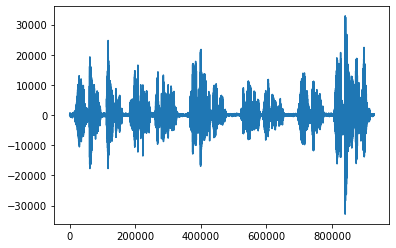

In [6]:
# display audio as playable and waveform plot
display(Audio(signal, rate=sample_rate_hz))
plt.plot(signal);

In [7]:
# Perform LPC, generate a video and return the reconstructed audio signal
signal_reconstructed = lpc(
    signal=signal, sample_rate_hz=sample_rate_hz, window_len_sec=0.02, video=True
)
display(Audio(signal_reconstructed, rate=sample_rate_hz))

Blocks:   0%|          | 0/2106 [00:00<?, ?it/s]

<string>:80: RuntimeWarning: divide by zero encountered in log10


The video shows many different things:

1. The bottom plot shows the waveform of the original signal on the left and the reconstructed signal on the right. Both plots contain an indicator which window the current sound output and data in the other plots corresponds to.

2. The plot on top shows on the left the spectrum of the current window of the original signal in blue, the transfer function in orange, and the spectrum of the error signal (after filtering) in green. Here we can clearly see that the filter *whitens* the signal, that is, it flattens the spectrum. On the right we see the spectrum of the synthesized excitation signal, the transfer function (same as on the left) and the spectrum of the resulting synthezied signal.

3. The plots in the middle show the fundamental frequency extracted from the error signal (the more transparent it is the less impulse signal is contained in the excitation signal), the waveform of the synthesised excitation signal and a model of how the vocal tract would look like.

## Copyright
This notebook is licensed to be used during the lecture COM[3502](http://www.dcs.shef.ac.uk/intranet/teaching/public/modules/level3/com3502.html "Open web page for COM3502 module")-[4502](http://www.dcs.shef.ac.uk/intranet/teaching/public/modules/level4/com4502.html "Open web page for COM4502 module")-[6502](http://www.dcs.shef.ac.uk/intranet/teaching/public/modules/msc/com6502.html "Open web page for COM4502 module") Speech Processing at the [University of Sheffield](https://www.sheffield.ac.uk/ "Open web page of The University of Sheffield"), Dept. of [Computer Science](https://www.sheffield.ac.uk/dcs "Open web page of Department of Computer Science, University of Sheffield"). Any further use (beyond use for the lecture) is only permitted if agreed with the [module lead](mailto:s.goetze@sheffield.ac.uk). 
### Contributors
[Stefan Goetze](http://www.stefan-goetze.de "Web page of Stefan Goetze"),
[Lena Strobl](https://github.com/sleyna/)

## References
[Mak] Makhoul, J Linear Prediction: A tutorial review. Proc. IEEE. 63, 63, 56 (1975).